## EDA (Exploratory Data Analysis) y ETL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

Basandome en la principal actividad de la empresa que es el acceso a internet y teniendo en cuenta el Kpi propuesto, haremos una seleccion de hojas a utilizar para tener una vision mas completa del mercado de internet en Argentina y que nuestro analisis este alineado. 

In [3]:
#Cargo el archivo
file_path = 'Dataset\Internet.xlsx'

#Cargo las hojas mas relevantes
df_vel_sin_rangos = pd.read_excel(file_path, sheet_name='Velocidad_sin_Rangos') 
df_accesos_por_tecno = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')
df_penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')
df_penetracion_totales = pd.read_excel(file_path, sheet_name='Penetracion-totales') 
df_ingresos = pd.read_excel(file_path, sheet_name='Ingresos')


In [4]:
#Visualizamos las primeras filas de cada DataFrame
df_vel_sin_rangos.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2023.0,4.0,Buenos Aires,93351.0,19.0,0.0,0.0,26703.0,187.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023.0,4.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023.0,4.0,Catamarca,77.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023.0,4.0,Chaco,4040.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023.0,4.0,Chubut,16589.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_vel_sin_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 906.3+ KB


In [6]:
df_accesos_por_tecno.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


In [7]:
df_accesos_por_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


In [8]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96


In [9]:
df_penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [10]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022


In [11]:
df_penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [12]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [13]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [14]:
#Verifico el contenido de la columna 'Año' en cada df
for name, df in {'Accesos por velocidad': df_vel_sin_rangos, 
                 'Accesos por tecnología': df_accesos_por_tecno, 
                 'Penetración hogares': df_penetracion_hogares, 
                 'Penetración totales': df_penetracion_totales, 
                 'Ingresos': df_ingresos}.items():
    print(f"\nValores únicos en la columna 'Año' para {name}:")
    print(df['Año'].unique())


Valores únicos en la columna 'Año' para Accesos por velocidad:
[2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan]

Valores únicos en la columna 'Año' para Accesos por tecnología:
[2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']

Valores únicos en la columna 'Año' para Penetración hogares:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración totales:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Ingresos:
[2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Al analizar los valores unicos en la columna Año en el DataFrame Ingresos, se observa que todos los años corresponden a un rango de 2014 a 2023. Es probable que el año 2033 haya sido escrito por error en lugar de 2023, por lo que se decide modificarlo para mantener coherencia con el resto de los datos.

In [15]:
#Reemplazar 2033 por 2023 en la columna 'Año'
df_ingresos['Año'].replace(to_replace=2033, value=2023, inplace=True)

In [16]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Debido a las inconsistencias en la columna Año, vamos a manejar estos casos y evitar problemas.

In [17]:
def limpiar_año(df):
    #Convierto la columna a string
    df['Año'] = df['Año'].astype(str)
    
    #Elimino cualquier caracter que no sea numero
    df['Año'] = df['Año'].str.replace(r'\D', '', regex=True)
    
    #Mantener solo los primeros 4 digitos
    df['Año'] = df['Año'].str[:4]

    #Convierto a numero, reemplazo valores Nan
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

    #Elimino filas donde 'Año' es Nan
    df = df.dropna(subset=['Año'])

    #Convierto a entero
    df['Año'] = df['Año'].astype(np.int64)

    return df

In [18]:
#Aplico la función a cada DataFrame
df_vel_sin_rangos = limpiar_año(df_vel_sin_rangos)
df_accesos_por_tecno = limpiar_año(df_accesos_por_tecno)
df_penetracion_hogares = limpiar_año(df_penetracion_hogares)
df_penetracion_totales = limpiar_año(df_penetracion_totales)
df_ingresos = limpiar_año(df_ingresos)

In [19]:
#Verifico el contenido de la columna 'Año' en cada df
for name, df in {'Velocidad sin rangos': df_vel_sin_rangos, 
                 'Accesos por tecnología': df_accesos_por_tecno, 
                 'Penetración hogares': df_penetracion_hogares, 
                 'Penetración totales': df_penetracion_totales, 
                 'Ingresos': df_ingresos}.items():
    print(f"\nValores únicos en la columna 'Año' para {name}:")
    print(df['Año'].unique())


Valores únicos en la columna 'Año' para Velocidad sin rangos:
[2023 2022 2021 2020 2019 2018 2017]

Valores únicos en la columna 'Año' para Accesos por tecnología:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración hogares:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración totales:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Ingresos:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Normalización de la columna "Ingresos (miles de pesos)"

In [20]:
#Selecciono la columna 'Ingresos (miles de pesos)'
ingresos_columna = df_ingresos[['Ingresos (miles de pesos)']]

#Inicializar el escalador Min-Max
scaler = MinMaxScaler()

#Ajusto y transformo los datos
df_ingresos['Ingresos_en_pesos'] = scaler.fit_transform(ingresos_columna)

# Verificar el resultado de la normalización
print(df_ingresos[['Ingresos (miles de pesos)', 'Ingresos_en_pesos']].head())
print(df_ingresos.info())

   Ingresos (miles de pesos)  Ingresos_en_pesos
0               1.673760e+08           1.000000
1               1.331066e+08           0.791538
2               1.180603e+08           0.700011
3               1.041350e+08           0.615303
4               7.244348e+07           0.422523
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
 4   Ingresos_en_pesos          40 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB
None


In [21]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos_en_pesos
0,2023,4,1.673760e+08,Oct-Dic 2023,1.000000
1,2023,3,1.331066e+08,Jul-Sept 2023,0.791538
2,2023,2,1.180603e+08,Jun-Mar 2023,0.700011
3,2023,1,1.041350e+08,Ene-Mar 2023,0.615303
4,2022,4,7.244348e+07,Oct-Dic 2022,0.422523


### Nulos

In [22]:
# Eliminamos filas con valores nulos
df_vel_sin_rangos = df_vel_sin_rangos.dropna()
df_accesos_por_tecno = df_accesos_por_tecno.dropna()
df_penetracion_hogares = df_penetracion_hogares.dropna()
df_penetracion_totales = df_penetracion_totales.dropna()
df_ingresos = df_ingresos.dropna()

### Duplicados

In [23]:
def verifica_duplicados(df, df_name):
    duplicados = df.duplicated()
    num_duplicados = duplicados.sum()
    
    if num_duplicados > 0:
        print(f"El DataFrame '{df_name}' tiene {num_duplicados} registros duplicados.")
    else:
        print(f"El DataFrame '{df_name}' no tiene registros duplicados.")

#Verifico duplicados en cada DataFrame
verifica_duplicados(df_vel_sin_rangos, 'df_vel_sin_rangos')
verifica_duplicados(df_accesos_por_tecno, 'df_accesos_por_tecno')
verifica_duplicados(df_penetracion_hogares, 'df_penetracion_hogares')
verifica_duplicados(df_penetracion_totales, 'df_penetracion_totales')
verifica_duplicados(df_ingresos, 'df_ingresos')

El DataFrame 'df_vel_sin_rangos' no tiene registros duplicados.
El DataFrame 'df_accesos_por_tecno' no tiene registros duplicados.
El DataFrame 'df_penetracion_hogares' no tiene registros duplicados.
El DataFrame 'df_penetracion_totales' no tiene registros duplicados.
El DataFrame 'df_ingresos' no tiene registros duplicados.


In [24]:
# Convertir la columna 'Periodo' a tipo fecha en df_penetracion_totales
df_penetracion_totales['Periodo'] = pd.to_datetime(df_penetracion_totales['Periodo'], format='%b-%Y', errors='coerce')

# Convertir la columna 'Periodo' a tipo fecha en df_ingresos
df_ingresos['Periodo'] = pd.to_datetime(df_ingresos['Periodo'], format='%b-%Y', errors='coerce')


In [25]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Año                        40 non-null     int64         
 1   Trimestre                  40 non-null     int64         
 2   Ingresos (miles de pesos)  40 non-null     float64       
 3   Periodo                    0 non-null      datetime64[ns]
 4   Ingresos_en_pesos          40 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.7 KB


In [26]:
#Verifico el contenido de la columna 'Trimestre'
for name, df in { 'Accesos por tecnología': df_accesos_por_tecno}.items():
    print(f"\nValores únicos en la columna 'Trimestre' para {name}:")
    print(df['Trimestre'].unique())


Valores únicos en la columna 'Trimestre' para Accesos por tecnología:
[4 3 2 1 '3 *' '2 *' '1 *']


In [27]:
#Limpio y convierto la columna 'Trimestre' a tipo int64 en df_accesos_por_tecno
#Limpiamos primero las cadenas con asteriscos y luego convertimos a int64
df_accesos_por_tecno['Trimestre'] = df_accesos_por_tecno['Trimestre'].astype(str).str.replace('*', '').astype('int64')

In [28]:
print(df['Trimestre'].unique())

[4 3 2 1]


### Outliers

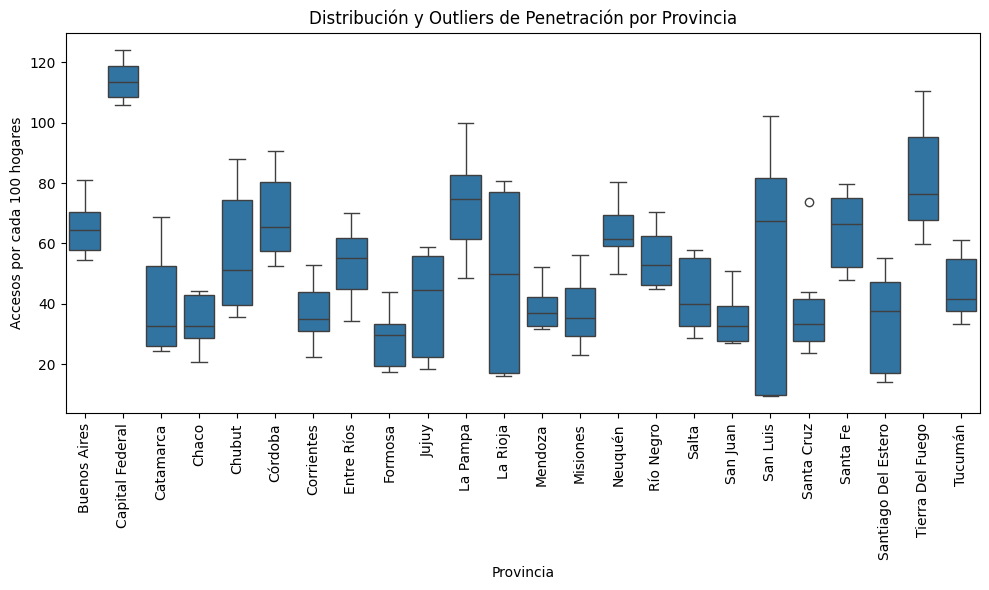

In [29]:
#1. Outliers en penetración de hogares
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_penetracion_hogares)
plt.title('Distribución y Outliers de Penetración por Provincia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Este diagrama de caja y bigotes muestra la distribucion y los valores atipicos de la penetracion de internet por cada 100 hogares en diferentes provincias Argentinas. El grafico muestra que la penetracion de internet es mas alta en Buenos Aires, Capital Federal, Cordoba, Santa Fe y Mendoza con mas de 80 accesos por cada 100 hogares. La penetracion es mas baja en las provincias del norte y sur del pais como Jujuy, Formosa, Chubut y Santa Cruz con menos de 40 accesos por cada 100 hogares. Tambien podemos ver algunos outliers en Tierra del Fuego con mas de 120 accesos y Santiago del Estero con menos de 20 accesos por cada 100 hogares. Continuamos con el analisis que nos permitira abordar estas disparidades y mejorar el acceso a internet.

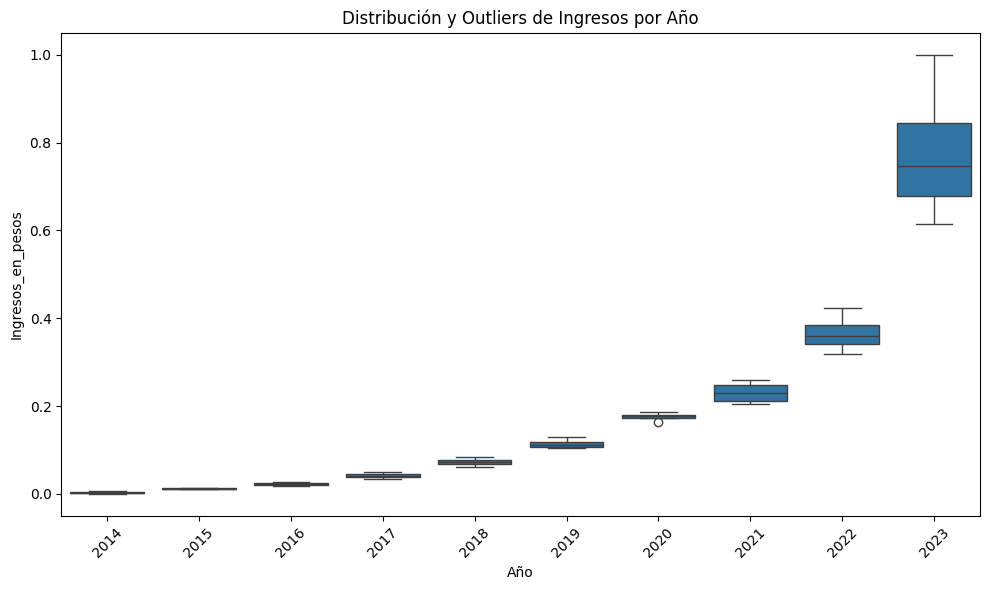

In [30]:
#2. Outliers para ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Ingresos_en_pesos', data=df_ingresos)
plt.title('Distribución y Outliers de Ingresos por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los ingresos han mostrado una tendencia creciente a lo largo de los años especialmente a partir del 2020, cuando ocurrio la pandemia de COVID-19 que provoco un aumento significativo en la demanda de servicios de internet. En 2023, se observa un rango amplio en los ingresos, indicando presencia de valores atipicos. Argentina ha experimentado altos niveles de inflacion en los ultimos años y es razonable suponer que parte del incremento en los ingresos puede estar influenciado por el ajuste de precios debido a la inflacion. Es importante continuar analizando para identificar oportunidades de crecimiento.

In [31]:
# Análisis de correlación entre ingresos y penetración
df_ingresos_penetracion = pd.merge(df_ingresos, df_penetracion_totales, on='Año')
correlation = df_ingresos_penetracion['Ingresos_en_pesos'].corr(df_ingresos_penetracion['Accesos por cada 100 hab'])

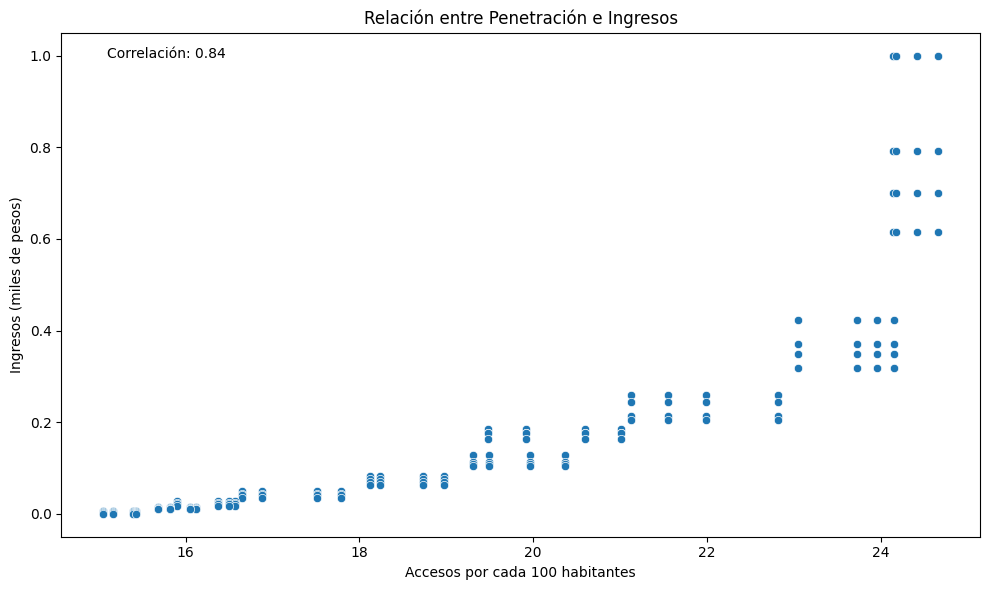

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accesos por cada 100 hab', y='Ingresos_en_pesos', data=df_ingresos_penetracion)
plt.title('Relación entre Penetración e Ingresos')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Ingresos (miles de pesos)')
plt.annotate(f'Correlación: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.tight_layout()
plt.show()

Este grafico muestra una relacion positiva entre la penetracion de internet e ingresos, lo cual tiene implicancias importantes para la actividad principal que es de acceso a internet. A medida que aumenta la penetracion de internet en una zona, mayor tendencia a tener ingresos mas altos. En general, las zonas con mayor penetracion de internet suelen tener mayor desarrollo economico y puede llevar a mayor consumo de servicios de internet. Sin embargo, la alta inflacion en nuestro pais afecta el poder adquisitivo de las personas lo que a su vez afecta la contratacion de servicios de internet. Tomar accion para mantener el crecimiento de la penetracion de internet y mitigar los efectos negativos de la situacion economica actual es de gran importancia.

### Calculamos y visualizamos las correlaciones entre accesos por cada 100 hogares, velocidad media e ingresos

In [33]:
#Selecciono las columnas que necesito de cada DataFrame

penetracion = df_penetracion_hogares[['Año', 'Trimestre', 'Accesos por cada 100 hogares']]
ingresos = df_ingresos[['Año', 'Trimestre', 'Ingresos_en_pesos']]


In [34]:
#Calculo la velocidad media
columnas_velocidad = [col for col in df_vel_sin_rangos.columns if 'Mbps' in col]
df_vel_sin_rangos['Velocidad_Media'] = df_vel_sin_rangos[columnas_velocidad].mean(axis=1)

In [35]:
#Selecciono columnas que necesito
velocidad = df_vel_sin_rangos[['Año', 'Trimestre', 'Provincia', 'Velocidad_Media']]

In [36]:
#Combino df, primero penetracion y velocidad y luego ingresos
df_combinado = pd.merge(penetracion, velocidad, on=['Año', 'Trimestre'])
df_combinado = pd.merge(df_combinado, ingresos, on=['Año', 'Trimestre'])

In [37]:
#Calculo correlaciones
correlaciones = df_combinado[['Accesos por cada 100 hogares', 'Velocidad_Media', 'Ingresos_en_pesos']].corr()

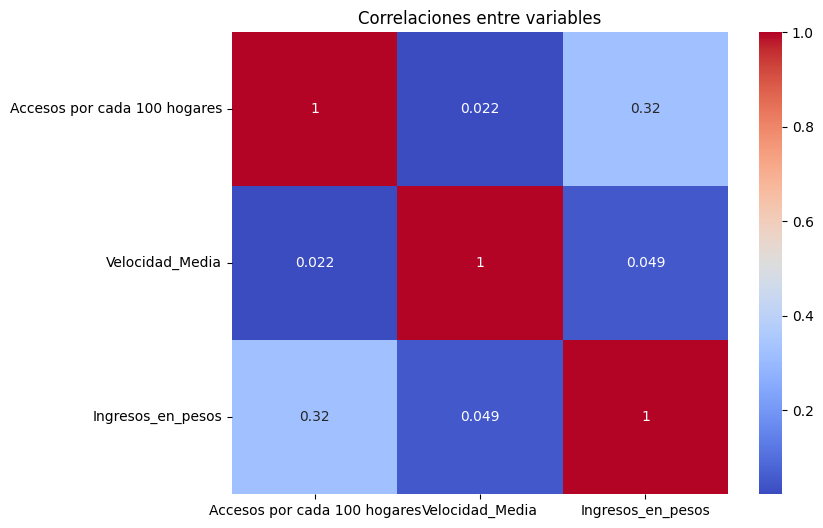

In [38]:
#Visualizo las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables')
plt.show()

Existe una correlacion moderada entre penetracion de internet y los ingresos lo que sugiere que aumentar la penetracion de internet podria tener un impacto en los ingresos. Por otro lado, la velocidad media del servicio no parece tener una relacion significativa ni con la penetracion ni con los ingresos, lo que sugiere que aumentar la velocidad media no necesariamente significa mas accesos o ingresos. Sin embargo es importante mencionar que pueden influir otros factores en estas relaciones.

In [39]:
#Calculamos el porcentaje promedio de accesos por año y trimestre
df_accesos_por_tecno['Total_Acessos'] = df_accesos_por_tecno[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)

#Calculamos el porcentaje de cada tecnologia
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    df_accesos_por_tecno[f'Porcentaje_{tech}'] = df_accesos_por_tecno[tech] / df_accesos_por_tecno['Total_Acessos'] * 100

In [40]:
#Calculamos el promedio de porcentaje para cada tecnologia
porcentajes_promedio = df_accesos_por_tecno[[f'Porcentaje_{tech}' for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]].mean()

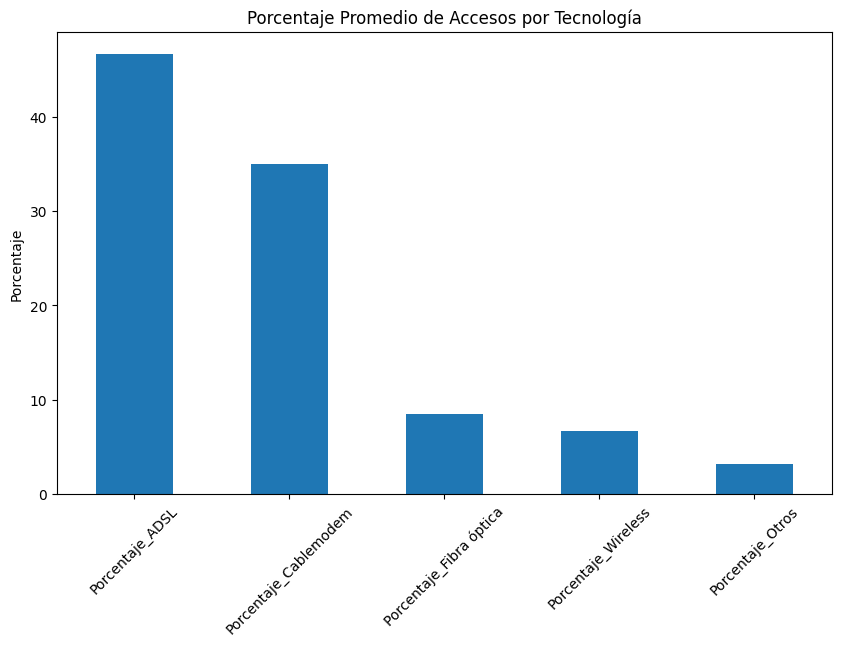

In [41]:
#Creamos un grafico de barras
plt.figure(figsize=(10, 6))
porcentajes_promedio.plot(kind='bar')
plt.title('Porcentaje Promedio de Accesos por Tecnología')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()

Esta distribucion muestra que las tecnologias mas tradicionales como ADSL (48% de accesos) y cablecodem (36% de accesos) aun dominan el mercado mientras que la fibra optica esta aun en crecimiento, todavia tiene un margen significativo para expandirse. Esto sugiere un potencial en el crecimiento de la fibra optica lo que generalmente se asocia a mejor calidad de servicio.

In [42]:
#Análizamos la correlacion de los accesos por tecnología 
#Combino DataFrames
df_combined = pd.merge(df_accesos_por_tecno, df_penetracion_hogares[['Año', 'Provincia', 'Accesos por cada 100 hogares']], on=['Año', 'Provincia'])
df_combined = pd.merge(df_combined, df_ingresos[['Año', 'Ingresos_en_pesos']], on=['Año'])

In [43]:
#Calculamos las correlaciones
correlaciones = df_combined[['Porcentaje_ADSL', 'Porcentaje_Cablemodem', 'Porcentaje_Fibra óptica', 
                             'Porcentaje_Wireless', 'Porcentaje_Otros', 'Accesos por cada 100 hogares', 
                             'Ingresos_en_pesos']].corr()

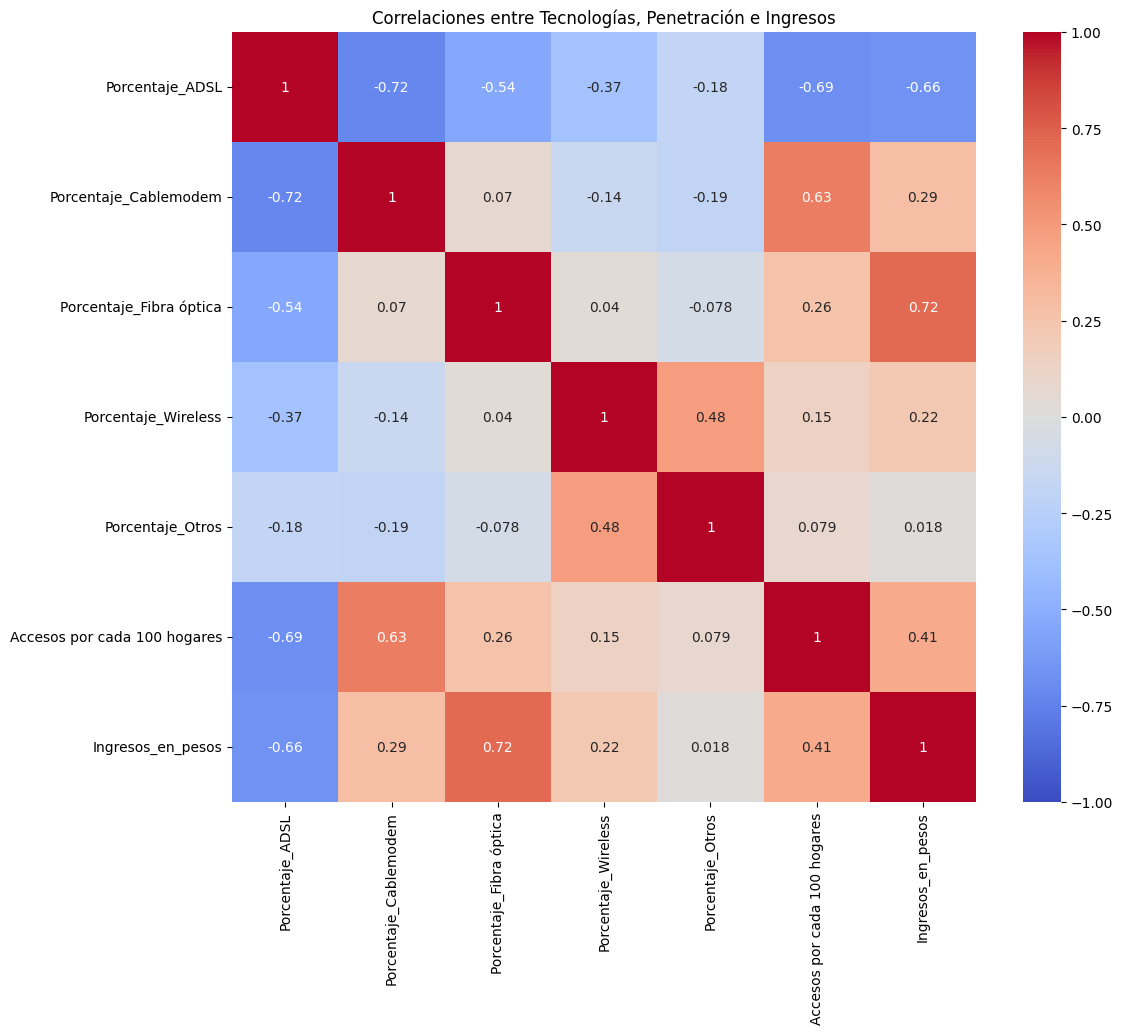

In [44]:
# Visualizamos las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlaciones entre Tecnologías, Penetración e Ingresos')
plt.show()

Fibra optica muestra la correlacion mas fuerte con los ingresos, lo que respalda un potencial para impulsar el crecimiento financiero. Cablemodem tiene una correlacion positiva y puede haber impulsado la penetracion de internet. En el caso de ADSL, las correlaciones son negativas señalando un declive de las tecnologias tradicionales, favoreciendo las mas modernas. Estas tecnologías son relativamente antiguas y menos eficientes que las opciones más recientes, como la fibra óptica. La fibra óptica muestra una correlación positiva con los ingresos. La fibra óptica es una tecnología más moderna y eficiente que ofrece mayor velocidad y capacidad de ancho de banda. Los clientes que optan por la fibra óptica suelen estar dispuestos a pagar precios más altos por un servicio superior. La empresa debe analizar priorizar la inversión en la expansión de su red de fibra óptica para aumentar sus ingresos y mejorar su competitividad.

Teniendo en cuenta el analisis realizado en este paso y considernando los KPIs propuestos ( 1. KPI: *Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia*, 2. KPI: *Aumentar en un 2% el acceso al servicio de internet por fibra óptica para el próximo trimestre*), decido seleccionar los DataFrames mas relevantes para continuar con el analisis y conclusiones.

## Definicion de KPIs
1. KPI: *Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia*
2. KPI: *Aumentar en un 2% el acceso al servicio de internet por fibra óptica para el próximo trimestre*

In [45]:
def calcular_kpi(fibra_actual, acceso_anterior):
    #Aplicar la validación
    if acceso_anterior != 0:
        return round((((fibra_actual - acceso_anterior) / acceso_anterior) * 100), 2)
    else:
        return 100  #O cualquier manejo deseado cuando el divisor es cero
df_penetracion_hogares = df_penetracion_hogares.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [46]:

df_accesos_por_tecno = df_accesos_por_tecno.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [47]:
#Creo la nueva columna con el valor del trimestre anterior en ambos dfs
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].shift(1)
df_accesos_por_tecno['Accesos trimestre anterior'] = df_accesos_por_tecno.groupby('Provincia')['Fibra óptica'].shift(1)

In [48]:
#Aplico la fórmula del KPI usando los valores del trimestre anterior
df_penetracion_hogares['KPI'] = df_penetracion_hogares.apply(lambda row: calcular_kpi(row['Accesos por cada 100 hogares'], row['Accesos trimestre anterior']), axis=1)
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares['Accesos trimestre anterior'].fillna(0)
df_penetracion_hogares['KPI'] = df_penetracion_hogares['KPI'].fillna(0)

In [49]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos trimestre anterior,KPI
936,2014,1,Buenos Aires,54.570073,0.000000,0.00
912,2014,2,Buenos Aires,55.061417,54.570073,0.90
888,2014,3,Buenos Aires,56.754739,55.061417,3.08
864,2014,4,Buenos Aires,56.094337,56.754739,-1.16
840,2015,1,Buenos Aires,56.370484,56.094337,0.49


In [50]:
df_accesos_por_tecno_KPI = df_accesos_por_tecno.drop(columns=['ADSL', 'Cablemodem', 'Wireless', 'Otros', 'Total', 'Total_Acessos', 'Porcentaje_ADSL', 'Porcentaje_Cablemodem', 'Porcentaje_Fibra óptica', 'Porcentaje_Wireless', 'Porcentaje_Otros'])

In [51]:
#Aplico la fórmula del KPI usando los valores del trimestre anterior
df_accesos_por_tecno_KPI['KPI'] = df_accesos_por_tecno_KPI.apply(lambda row: calcular_kpi(row['Fibra óptica'], row['Accesos trimestre anterior']), axis=1)
df_accesos_por_tecno_KPI['Accesos trimestre anterior'] = df_accesos_por_tecno_KPI['Accesos trimestre anterior'].fillna(0)
df_accesos_por_tecno_KPI['KPI'] = df_accesos_por_tecno_KPI['KPI'].fillna(0)

In [52]:
df_accesos_por_tecno_KPI['Accesos trimestre anterior'] = df_accesos_por_tecno_KPI['Accesos trimestre anterior'].round(2)
df_accesos_por_tecno['Accesos trimestre anterior'] = df_accesos_por_tecno['Accesos trimestre anterior'].round(2)
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares['Accesos trimestre anterior'].round(2)

In [57]:
df_accesos_por_tecno_KPI.head()

,Año,Trimestre,Provincia,Fibra óptica,Accesos trimestre anterior,KPI
936,2014,1,Buenos Aires,120960.0,0.0,0.00
912,2014,2,Buenos Aires,120008.0,120960.0,-0.79
888,2014,3,Buenos Aires,124474.0,120008.0,3.72
864,2014,4,Buenos Aires,120528.0,124474.0,-3.17
840,2015,1,Buenos Aires,134177.0,120528.0,11.32


In [58]:
df_accesos_por_tecno.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Total_Acessos,Porcentaje_ADSL,Porcentaje_Cablemodem,Porcentaje_Fibra óptica,Porcentaje_Wireless,Porcentaje_Otros,Accesos trimestre anterior
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,2739876.0,57.217370,36.530084,4.414798,0.603239,1.234508,NaN
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,2764546.0,56.750041,37.094337,4.340966,0.615653,1.199003,120960.0
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,2849565.0,54.834089,38.975352,4.368175,0.703581,1.118802,120008.0
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,2816407.0,55.957040,37.996461,4.279495,0.629454,1.137549,124474.0
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,2861842.0,55.318742,38.326225,4.688484,0.655312,1.011237,120528.0


In [59]:
#Formateo los porcentajes como texto con el símbolo % para que se carguen correctamente en power bi
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    df_accesos_por_tecno[f'Porcentaje_{tech}'] = df_accesos_por_tecno[f'Porcentaje_{tech}'].apply(lambda x: f'{x:.2f}%')

In [60]:
df_penetracion_hogares.to_csv('penetracion_hogares.csv', index=False, encoding='utf-8')
df_accesos_por_tecno.to_csv('accesos_por_tecno.csv', index=False, encoding='utf-8')
df_accesos_por_tecno_KPI.to_csv('accesos_por_tecno_KPI.csv', index=False, encoding='utf-8')